In [1]:
#qst1
import pandas as pd
from utils import generate_random_sales

# Generate monthly dates for one year
dates = pd.date_range(start='2025-01-01', periods=12, freq='MS')  
# Generate random sales for each product
product_a_sales = generate_random_sales(50, 100, size=len(dates))
product_b_sales = generate_random_sales(30, 80, size=len(dates))
product_c_sales = generate_random_sales(20, 60, size=len(dates))
product_d_sales = generate_random_sales(10, 50, size=len(dates))

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Product_A': product_a_sales,
    'Product_B': product_b_sales,
    'Product_C': product_c_sales,
    'Product_D': product_d_sales
})

# Save to CSV
df.to_csv('data/initial.csv', index=False)


df.head()

,Date,Product_A,Product_B,Product_C,Product_D
0,2025-01-01,63,38,56,41
1,2025-02-01,53,35,22,49
2,2025-03-01,76,36,58,40
3,2025-04-01,63,39,59,44
4,2025-05-01,77,70,33,10


In [2]:
import pandas as pd
from utils import (
    add_total_sales, add_average_sales, add_mom_growth,
    map_month_to_quarter, add_max_sales_product, add_min_sales_product
)

# Load the initial dataset 
df = pd.read_csv('data/initial.csv')

# Compute monthly metrics
product_cols = ['Product_A','Product_B','Product_C','Product_D']
df = add_total_sales(df, product_cols)
df = add_average_sales(df, product_cols)
df = add_mom_growth(df)

# Assign each month to a quarter
# First, extract month abbreviations from 'Date'
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%b')
df = map_month_to_quarter(df, month_column='Month')

#  Add max/min sales product per month
df = add_max_sales_product(df, product_cols)
df = add_min_sales_product(df, product_cols)

#  Save the final DataFrame
df.to_csv('data/final.csv', index=False)


from IPython.display import display
display(df)




,Date,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Month_over_Month_Growth,Month,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,63,38,56,41,198,49.50,NaN,Jan,Q1,Product_A,Product_B
1,2025-02-01,53,35,22,49,159,39.75,-19.696970,Feb,Q1,Product_A,Product_C
2,2025-03-01,76,36,58,40,210,52.50,32.075472,Mar,Q1,Product_A,Product_B
3,2025-04-01,63,39,59,44,205,51.25,-2.380952,Apr,Q2,Product_A,Product_B
4,2025-05-01,77,70,33,10,190,47.50,-7.317073,May,Q2,Product_A,Product_D
5,2025-06-01,81,70,28,43,222,55.50,16.842105,Jun,Q2,Product_A,Product_C
6,2025-07-01,75,51,57,44,227,56.75,2.252252,Jul,Q3,Product_A,Product_D
7,2025-08-01,99,34,33,40,206,51.50,-9.251101,Aug,Q3,Product_A,Product_C
8,2025-09-01,72,79,53,40,244,61.00,18.446602,Sep,Q3,Product_B,Product_D
9,2025-10-01,60,53,23,36,172,43.00,-29.508197,Oct,Q4,Product_A,Product_C


In [4]:
import pandas as pd
from IPython.display import display
from utils import pivot_avg_sales_per_quarter, pivot_total_sales_per_quarter, save_summaries_to_single_csv

# Load final DataFrame from Q2
df = pd.read_csv('data/final.csv')
product_cols = ['Product_A','Product_B','Product_C','Product_D']

# Ensure Total_Sales column exists
if 'Total_Sales' not in df.columns:
    from utils import add_total_sales
    df = add_total_sales(df, product_cols)

# Compute average sales per quarter
avg_sales_quarter = pivot_avg_sales_per_quarter(df, product_cols)

# 2️Compute total sales per quarter
total_sales_quarter = pivot_total_sales_per_quarter(df, product_cols)

#  Save both in a single CSV
combined_df = save_summaries_to_single_csv(avg_sales_quarter, total_sales_quarter, filename='data/output.csv')

#  Display separate tables 
print("=== Average Sales per Quarter ===")
display(avg_sales_quarter)

print("\n=== Total Sales per Quarter ===")
display(total_sales_quarter)


=== Average Sales per Quarter ===


,Quarter,Product_A,Product_B,Product_C,Product_D,Total_Sales
0,Q1,64.000000,36.333333,45.333333,43.333333,189.000000
1,Q2,73.666667,59.666667,40.000000,32.333333,205.666667
2,Q3,82.000000,54.666667,47.666667,41.333333,225.666667
3,Q4,78.333333,40.000000,34.333333,29.333333,182.000000



=== Total Sales per Quarter ===


,Quarter,Product_A,Product_B,Product_C,Product_D,Total_Sales
0,Q1,192,109,136,130,567
1,Q2,221,179,120,97,617
2,Q3,246,164,143,124,677
3,Q4,235,120,103,88,546


In [5]:
import pandas as pd
from utils import best_month, best_product, best_quarter

# Load final DataFrame
df = pd.read_csv('data/final.csv')
product_cols = ['Product_A','Product_B','Product_C','Product_D']

# Best month
month, month_sales = best_month(df, month_column='Month')
print(f"Best Month: {month} with {month_sales} sales")

#  Best product
product, product_sales = best_product(df, product_cols)
print(f"Best Product: {product} with {product_sales} total sales")

#  Best quarter
quarter, quarter_sales = best_quarter(df, quarter_column='Quarter')
print(f"Best Quarter: {quarter} with {quarter_sales} total sales")


Best Month: Sep with 244 sales
Best Product: Product_A with 894 total sales
Best Quarter: Q3 with 677 total sales


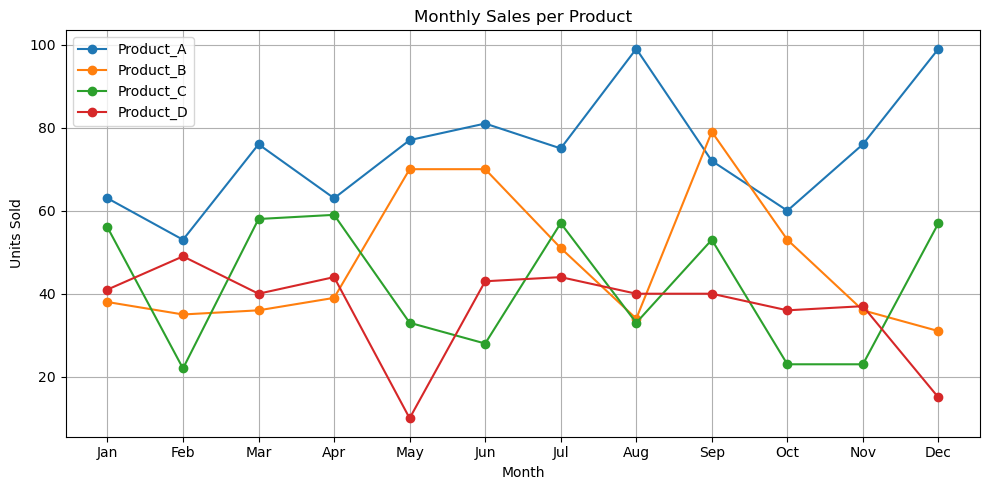

<Figure size 1000x500 with 0 Axes>

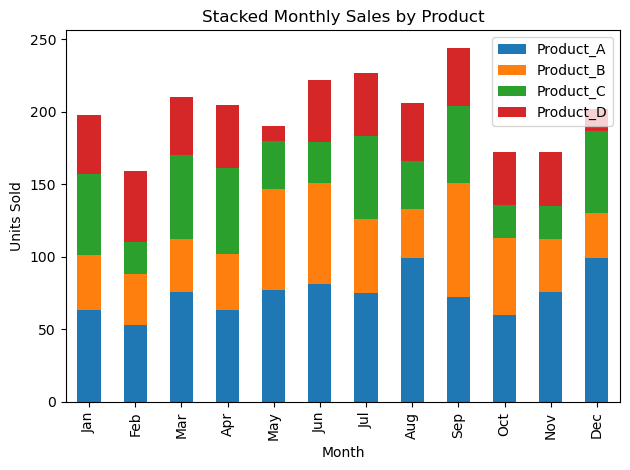

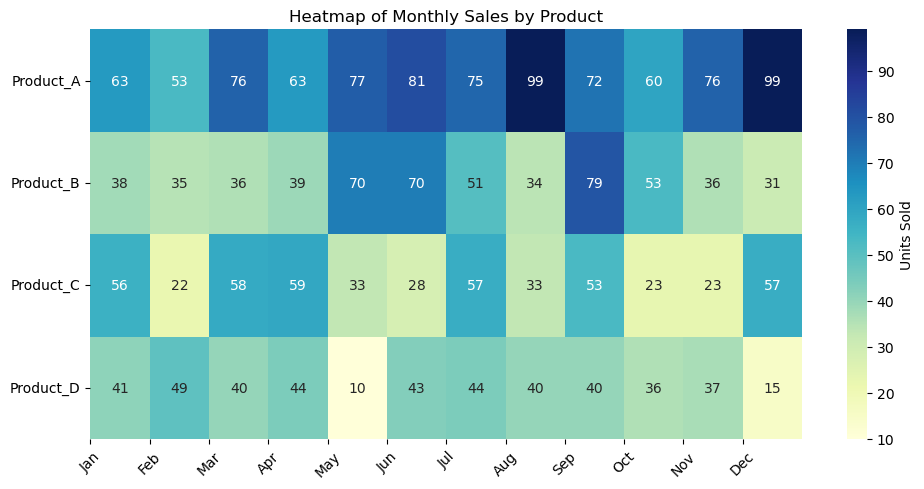

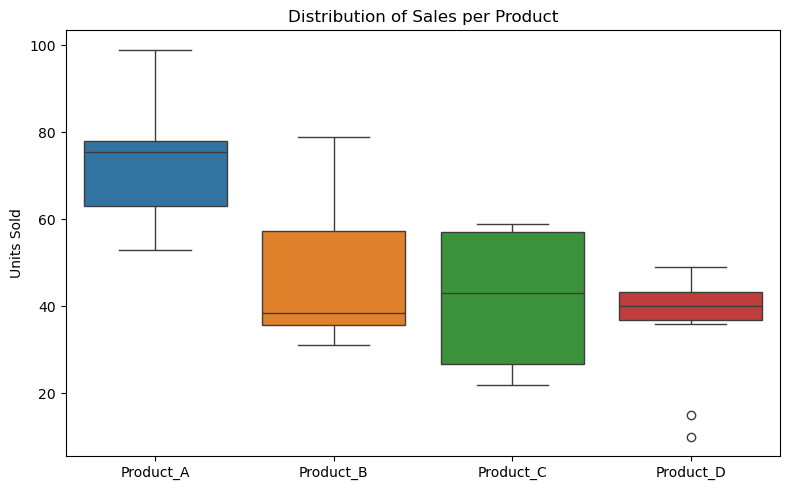

All plots saved in the 'plots' folder.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create plots folder if it doesn't exist
os.makedirs('plots', exist_ok=True)

# Load final DataFrame
df = pd.read_csv('data/final.csv')
product_cols = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

# Line chart for each product across months 
plt.figure(figsize=(10,5))
for product in product_cols:
    plt.plot(df['Month'], df[product], marker='o', label=product)
plt.title("Monthly Sales per Product")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/line_chart_products.png')
plt.show()  

#  Stacked bar chart of total monthly sales by product 
plt.figure(figsize=(10,5))
df.set_index('Month')[product_cols].plot(kind='bar', stacked=True)
plt.title("Stacked Monthly Sales by Product")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.savefig('plots/stacked_bar_sales.png')
plt.show()  

#  Seaborn heatmap: monthly sales of each product 
plt.figure(figsize=(10,5))
sns.heatmap(df[product_cols].T, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Units Sold'})
plt.xticks(ticks=range(len(df['Month'])), labels=df['Month'], rotation=45)
plt.yticks(rotation=0)
plt.title("Heatmap of Monthly Sales by Product")
plt.tight_layout()
plt.savefig('plots/heatmap_sales.png')
plt.show()  

#  Seaborn boxplot: distribution of sales per product 
plt.figure(figsize=(8,5))
sns.boxplot(data=df[product_cols])
plt.title("Distribution of Sales per Product")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.savefig('plots/boxplot_sales.png')
plt.show()  

print("All plots saved in the 'plots' folder.")
